In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
len(df)

20640

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


## Exploratory data analysis

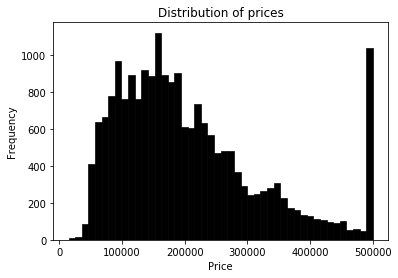

In [8]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [9]:
df = df.drop('ocean_proximity', axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


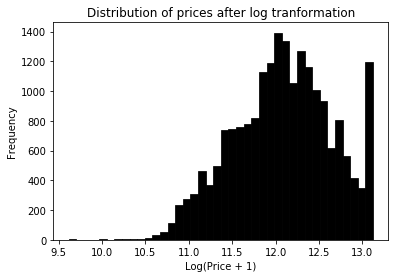

In [10]:
log_price = np.log1p(df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

## Question 1

In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2

In [13]:
df['population'].median()

1166.0

## Validation framework

In [113]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [114]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Linear Regression

In [115]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## Baseline solution (fill NAs with 0)

In [19]:
def prepare_X_zeros(dframe):
    dframe = dframe.fillna(0)
    X = dframe.values
    return X

In [20]:
X_train_zeros = prepare_X_zeros(df_train)
w_0_zeros, w_zeros = train_linear_regression(X_train_zeros, y_train)

In [21]:
y_pred_zeros = w_0_zeros + X_train_zeros.dot(w_zeros)

In [92]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [ ]:
rmse(y_train, y_pred_zeros)

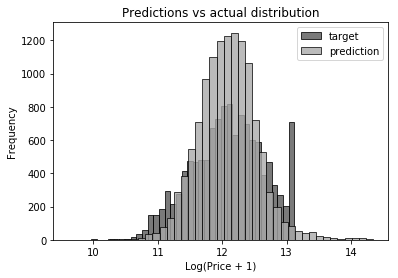

In [22]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_zeros, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## Baseline solution (fill NAs with means)

In [23]:
def prepare_X_means(dframe):
    dframe = dframe.fillna(df_train.mean())
    X = dframe.values
    return X

In [24]:
X_train_means = prepare_X_means(df_train)
w_0_means, w_means = train_linear_regression(X_train_means, y_train)

In [25]:
y_pred_means = w_0_means + X_train_means.dot(w_means)

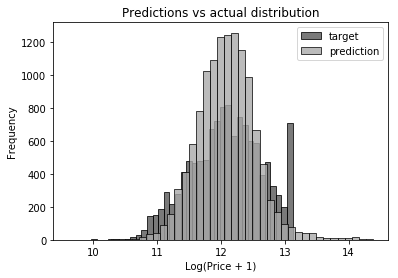

In [26]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_means, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## Comparing RMSEs

In [106]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return round(np.sqrt(mse), 2)

In [37]:
rmse(y_train, y_pred_zeros)

0.34

In [38]:
rmse(y_train, y_pred_means)

0.34

In [84]:
X_val = prepare_X_zeros(df_val)
y_pred = w_0_zeros + X_val.dot(w_zeros)

In [85]:
rmse(y_val, y_pred)

0.34

## Question 4

In [116]:
X_train = prepare_X_zeros(df_train)
X_val = prepare_X_zeros(df_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 0.33
 1e-06 0.33
0.0001 0.33
 0.001 0.33
  0.01 0.33
   0.1 0.33
     1 0.33
     5 0.34
    10 0.34


In [53]:
X_train = prepare_X_zeros(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X_zeros(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X_zeros(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.33
test: 0.35


## Question 5

In [101]:
rmses = np.array([])
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(i)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    def train_linear_regression(X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        XTX = X.T.dot(X)
        XTX_inv = np.linalg.inv(XTX)
        w = XTX_inv.dot(X.T).dot(y)

        return w[0], w[1:]

    # def prepare_X_zeros(dframe):
    #     dframe = dframe.fillna(0)
    #     X = dframe.values
    #     return X

    X_train_zeros = prepare_X_zeros(df_train)
    w_0_zeros, w_zeros = train_linear_regression(X_train_zeros, y_train)

    #y_pred_zeros = w_0_zeros + X_train_zeros.dot(w_zeros)

    # def rmse(y, y_pred):
    #     error = y_pred - y
    #     mse = (error ** 2).mean()
    #     return round(np.sqrt(mse), 2)

    #print(rmses)
    X_val = prepare_X_zeros(df_val)
    y_pred = w_0_zeros + X_val.dot(w_zeros)
    rmse_score = rmse(y_val, y_pred)
    rmses = np.append(rmses, rmse_score)
    print(rmse_score)
print(round(np.std(rmses), 3))

0.33884304805289966
0.33623872559571333
0.3320912318842838
0.34051536090423823
0.3389024066572522
0.34348667257183185
0.34519809530989215
0.33959899274077926
0.3466230873190806
0.33659261241731925
0.004


## Question 6

In [108]:
np.random.seed(9)

n = len(df)

n_test = int(0.2 * n)
n_train = n - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_test = df_shuffled.iloc[n_train:].copy()

y_train_orig = df_train.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_test['median_house_value']

In [111]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [112]:
X_train = prepare_X_zeros(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_test = prepare_X_zeros(df_test)
y_pred = w_0 + X_test.dot(w)
print('test', rmse(y_test, y_pred))

train 0.35
test 0.36
